In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**


In [2]:
df = pd.read_csv("train.csv")

**Examining the distribution of house prices:**

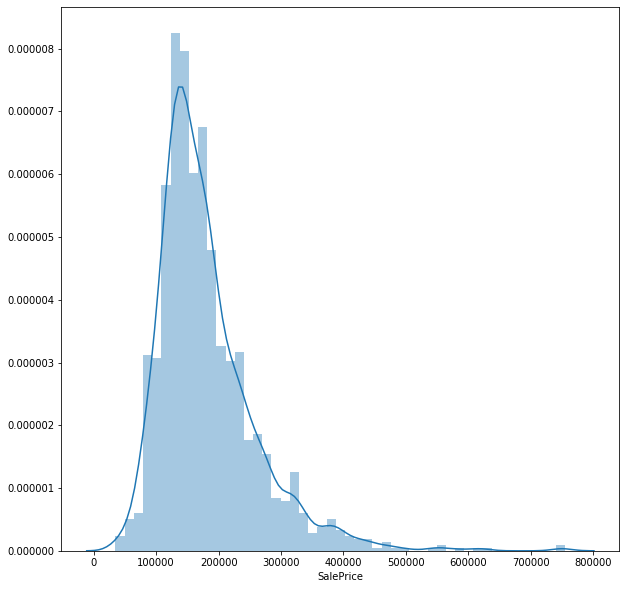

In [3]:
fig = plt.figure(figsize=(10,10))

sns.distplot(df["SalePrice"])

**Initial anaylsis on neighborhood feature:**

Starts with examining average house prices by neighborhood

In [4]:
# Checking for any null values within the feature

len(df[df["Neighborhood"].isnull()])

0

In [5]:
# Setting global maplotlib parameters

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

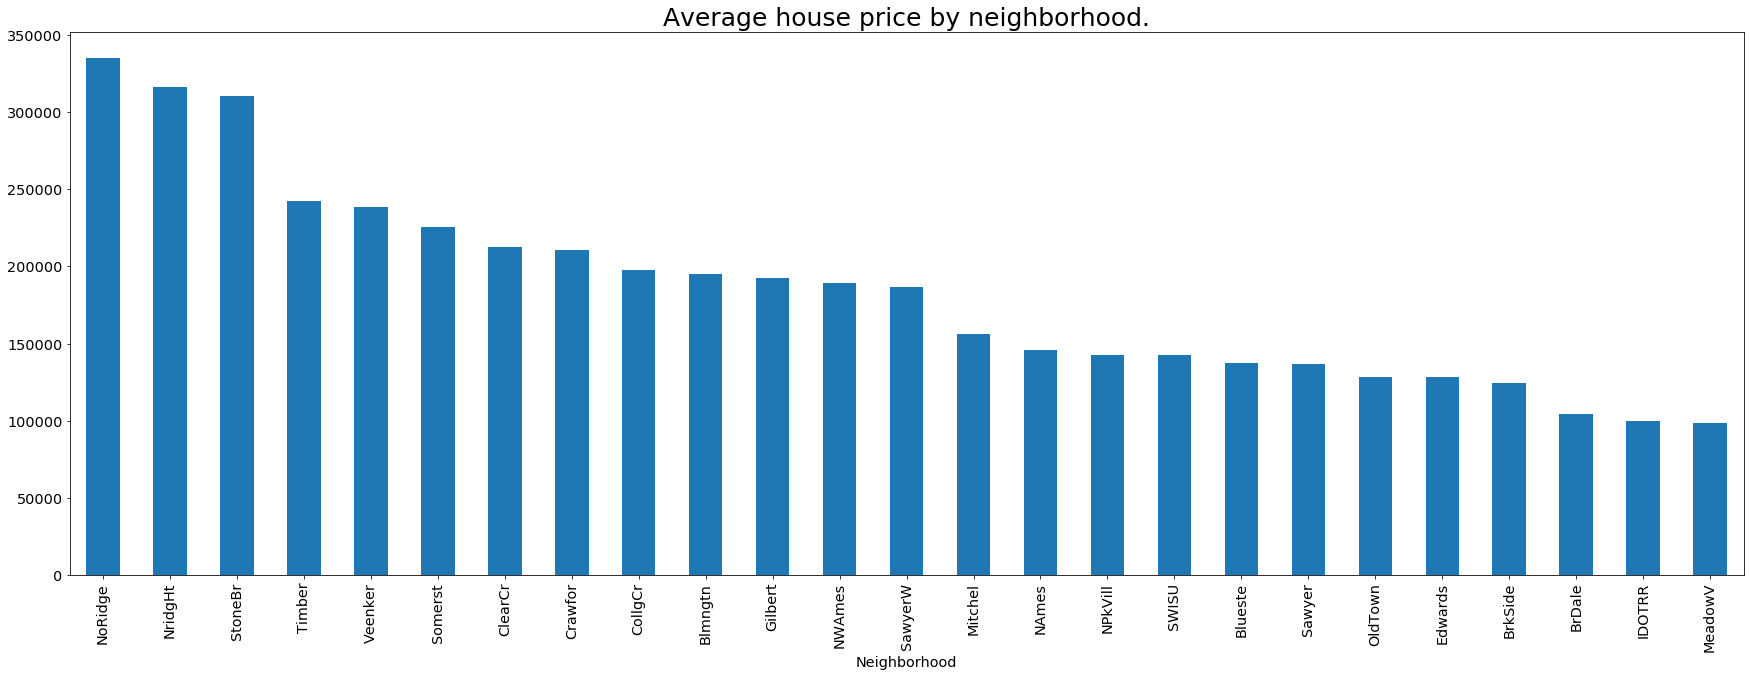

In [6]:
# Checking to see the average sale price by neighborhood.

fig = plt.figure(figsize=(30,10))
plt.title("Average house price by neighborhood.", fontsize=25)

df.groupby("Neighborhood").mean()["SalePrice"].sort_values(ascending = False).plot.bar()

(0, 40)

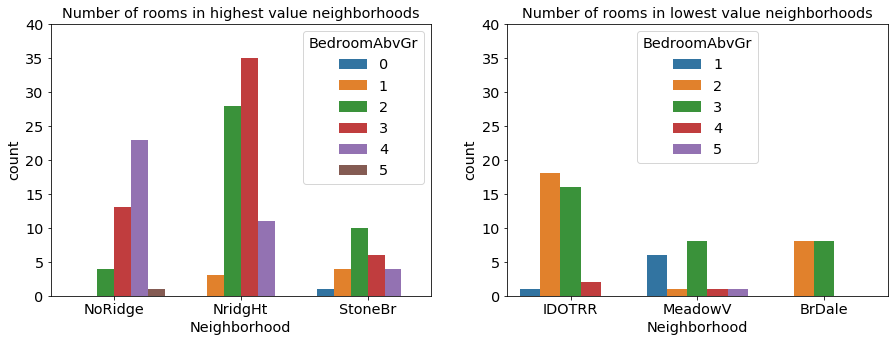

In [7]:
# Comparing number of rooms in the top three most expensive neighborhoods to the bottom three

av_hood_price = df.groupby("Neighborhood").mean()["SalePrice"].sort_values(ascending = False)
av_hood_price.head(3).index
av_hood_price.tail(3).index

fig, a = plt.subplots(1,2)

sns.countplot(data = df[df["Neighborhood"].isin(av_hood_price.head(3).index)], x = "Neighborhood",
              hue = "BedroomAbvGr", ax = a[0])
sns.countplot(data = df[df["Neighborhood"].isin(av_hood_price.tail(3).index)], x = "Neighborhood",
              hue = "BedroomAbvGr", ax = a[1])
    
a[1].set_title("Number of rooms in lowest value neighborhoods")
a[1].set_ylim(0,40)    



a[0].set_title("Number of rooms in highest value neighborhoods")
a[0].set_ylim(0,40)    



In [8]:
av_hood_price.head(3).index

Index(['NoRidge', 'NridgHt', 'StoneBr'], dtype='object', name='Neighborhood')

**Practicing normalising**

In [9]:
# Finding the columns made of floats or intergers

floats = []
for i in df.columns:
    if df[i].dtype == float:
        floats.append(i)
    elif df[i].dtype == "int64":
        floats.append(i)

nums = df[floats]

In [66]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
nums = sc_X.fit_transform(nums)